# Introduction to Keras Functional API

The **Keras Functional API** is a powerful way to build complex neural network architectures that go beyond the sequential model. Unlike the Sequential API, which is limited to linear stacks of layers, the Functional API allows you to:

- **Create multi-input or multi-output models**.
- **Share layers** across different parts of the model.
- **Build directed acyclic graphs (DAGs)** of layers, enabling more flexible architectures.

The Functional API is particularly useful for:
- Models with **branches** (e.g., siamese networks, multi-task learning).
- Models with **residual connections** (e.g., ResNet).
- Models that require **custom connections** between layers.

To use the Functional API, you define **Input layers** explicitly and connect layers by calling them on tensors. The final model is created by specifying the inputs and outputs.

---

In [ ]:
from keras.models import Model
from keras.layers import *

In [ ]:
x = Input(shape=(3,))

In [ ]:
hidden1 = Dense(128,activation='relu')(x)
hidden2 = Dense(64,activation='relu')(hidden1)

output1 = Dense(1,activation='linear')(hidden2)
output2 = Dense(1,activation='sigmoid')(hidden2)

In [ ]:
model = Model(inputs = x ,outputs = [output1,output2])

# Model Architecture Description

This is a simple feedforward neural network with the following structure:

1. **Input Layer**:
   - Accepts input of shape `(None, 3)`, where `3` represents the number of features.

2. **First Dense Layer**:
   - A fully connected layer with 128 units.
   - Output shape: `(None, 128)`.
   - Number of parameters: 512 (weights and biases).

3. **Second Dense Layer**:
   - A fully connected layer with 64 units.
   - Output shape: `(None, 64)`.
   - Number of parameters: 8,256 (weights and biases).

4. **Third Dense Layer**:
   - A fully connected layer with 1 unit.
   - Output shape: `(None, 1)`.
   - Number of parameters: 65 (weights and biases).

5. **Fourth Dense Layer**:
   - Another fully connected layer with 1 unit.
   - Output shape: `(None, 1)`.
   - Number of parameters: 65 (weights and biases).

This model is a straightforward feedforward network with two hidden layers (128 and 64 units) and two output layers (each with 1 unit). It is suitable for tasks like regression or binary classification, depending on the activation functions used in the output layers.

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 3)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │            512 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 64)             │          8,256 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │             65 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 1)              │             65 │ dense_1[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 8,898 (34.76 KB)

 Trainable params: 8,898 (34.76 KB)

 Non-trainable params: 0 (0.00 B)

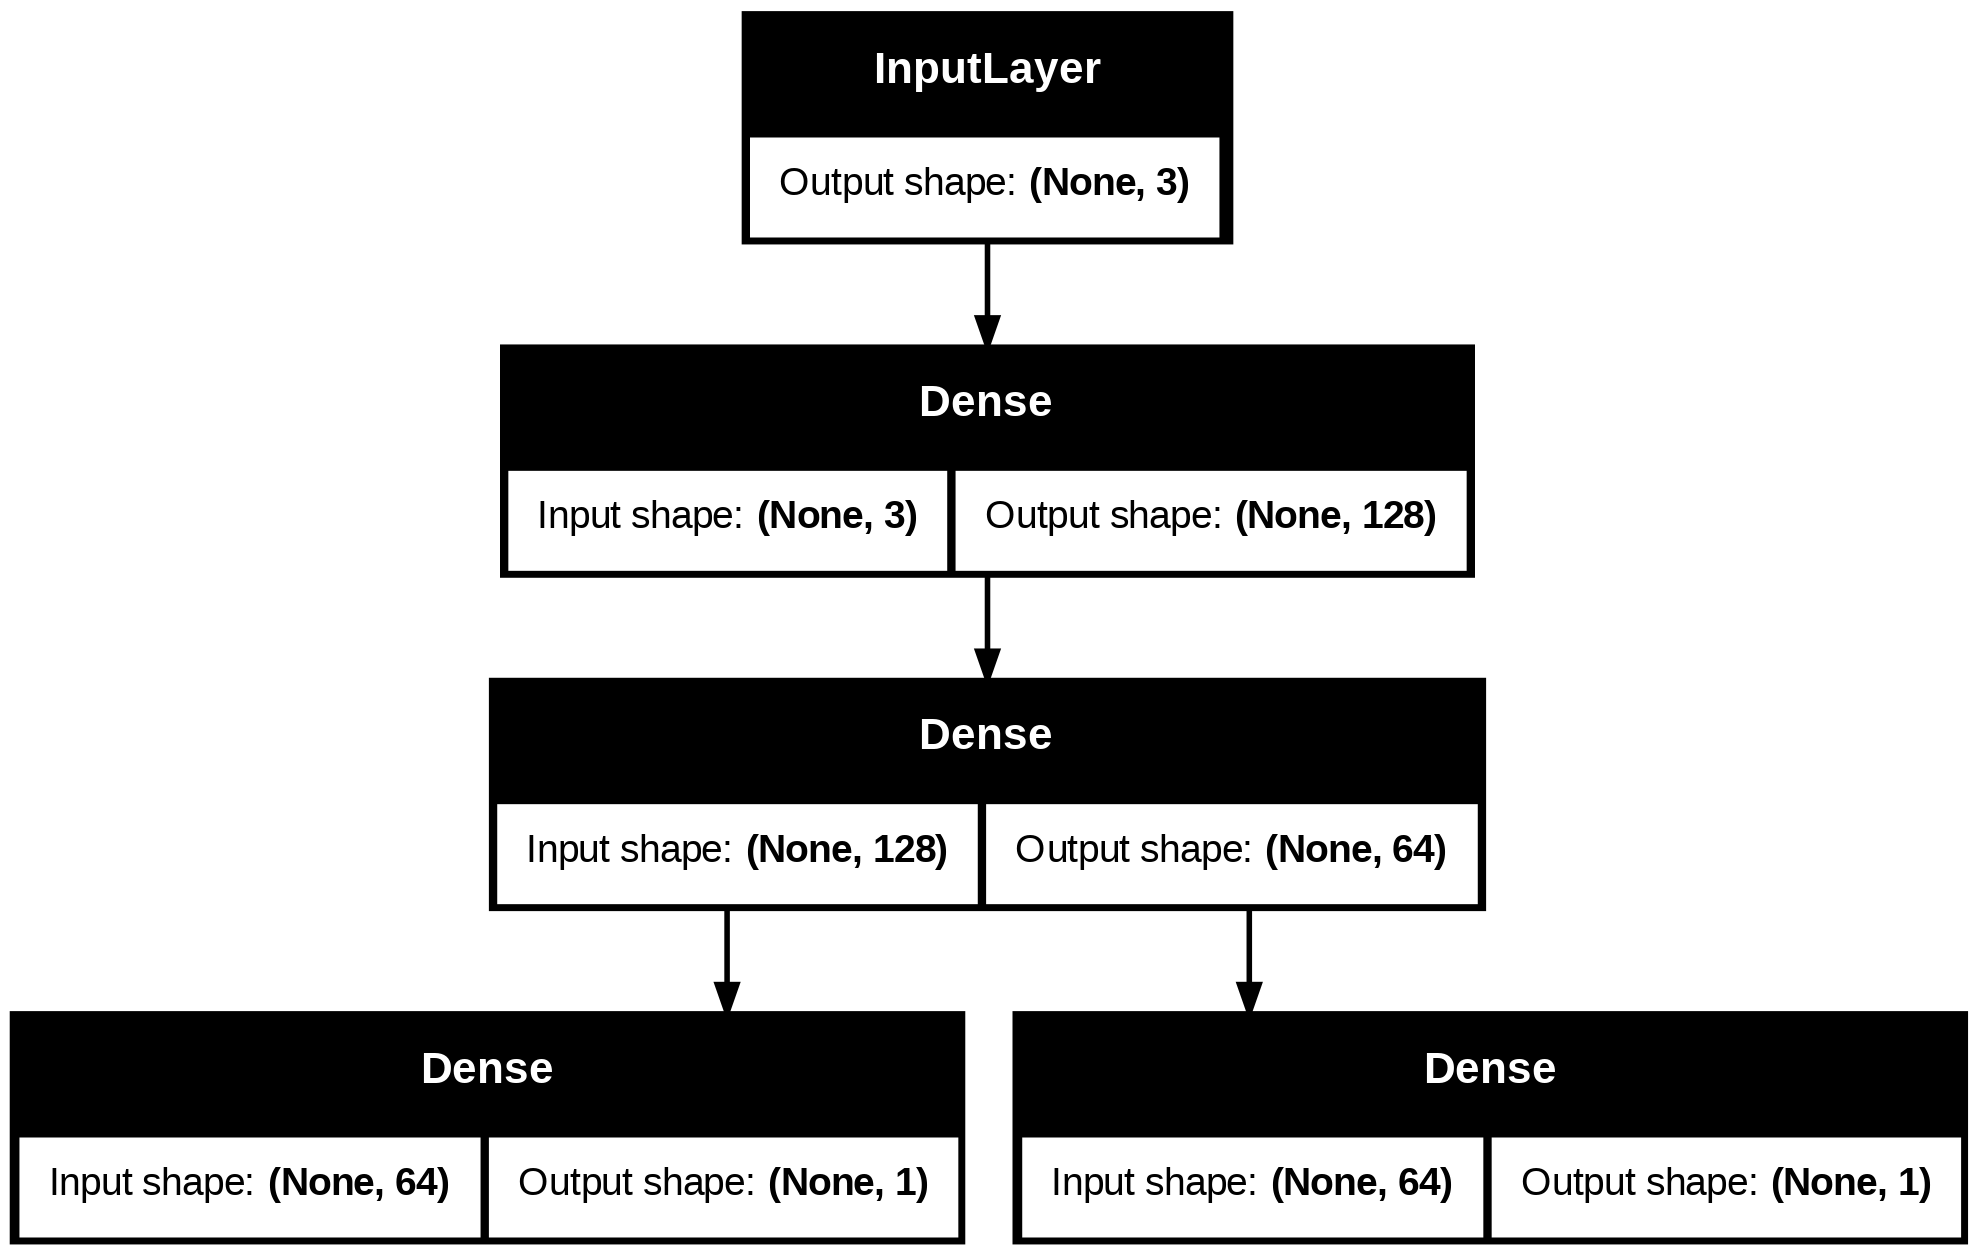

In [ ]:
from keras.utils import plot_model
plot_model(model,show_shapes=True)

# HOMEWORK
# Neural Network Architecture Description

This architecture is designed to process multiple inputs and produce two outputs. Below is a breakdown of the components:

1. **Input Layers**:
   - Two variable-length sequence inputs (`input1` and `input2`).
   - One fixed-size input (`input3`) with a shape of `(12,)`.

2. **Embedding Layers**:
   - Two embedding layers convert the sequence inputs into dense vectors of size 64.

3. **LSTM Layers**:
   - The first LSTM layer processes the first embedded sequence and outputs 128 units.
   - The second LSTM layer processes the second embedded sequence and outputs 32 units.

4. **Concatenation**:
   - The outputs of the two LSTM layers and the third input are concatenated into a single vector.

5. **Dense Layers**:
   - The first dense layer produces 4 outputs with a `softmax` activation for multi-class classification.
   - The second dense layer produces 1 output with a `sigmoid` activation for binary classification.

6. **Model Compilation**:
   - The model is compiled using the Adam optimizer, with `categorical_crossentropy` for the first output and `binary_crossentropy` for the second output.

This architecture is flexible and can be adapted for tasks involving both sequence and structured data.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, LSTM, Concatenate, Dense
from tensorflow.keras.models import Model

# Define input layers
input1 = Input(shape=(None,), name='input1')
input2 = Input(shape=(None,), name='input2')
input3 = Input(shape=(12,), name='input3')

# Define embedding layers
embedding1 = Embedding(input_dim=10000, output_dim=64)(input1)  # Adjust input_dim as needed
embedding2 = Embedding(input_dim=10000, output_dim=64)(input2)  # Adjust input_dim as needed

# Define LSTM layers
lstm1 = LSTM(128)(embedding1)
lstm2 = LSTM(32)(embedding2)

# Concatenate the LSTM outputs and the third input
concatenated = Concatenate()([lstm1, lstm2, input3])

# Define dense layers
dense1 = Dense(4, activation='softmax')(concatenated)
dense2 = Dense(1, activation='sigmoid')(concatenated)

# Create the model
model = Model(inputs=[input1, input2, input3], outputs=[dense1, dense2])

# Compile the model
model.compile(optimizer='adam', loss=['categorical_crossentropy', 'binary_crossentropy'], metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input1 (InputLayer)       │ (None, None)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input2 (InputLayer)       │ (None, None)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, None, 64)       │        640,000 │ input1[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, None, 64)       │        640,000 │ input2[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 128)            │         98,816 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ (None, 32)             │         12,416 │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input3 (InputLayer)       │ (None, 12)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 172)            │              0 │ lstm[0][0],            │
│                           │                        │                │ lstm_1[0][0],          │
│                           │                        │                │ input3[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 4)              │            692 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 1)              │            173 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,392,097 (5.31 MB)

 Trainable params: 1,392,097 (5.31 MB)

 Non-trainable params: 0 (0.00 B)

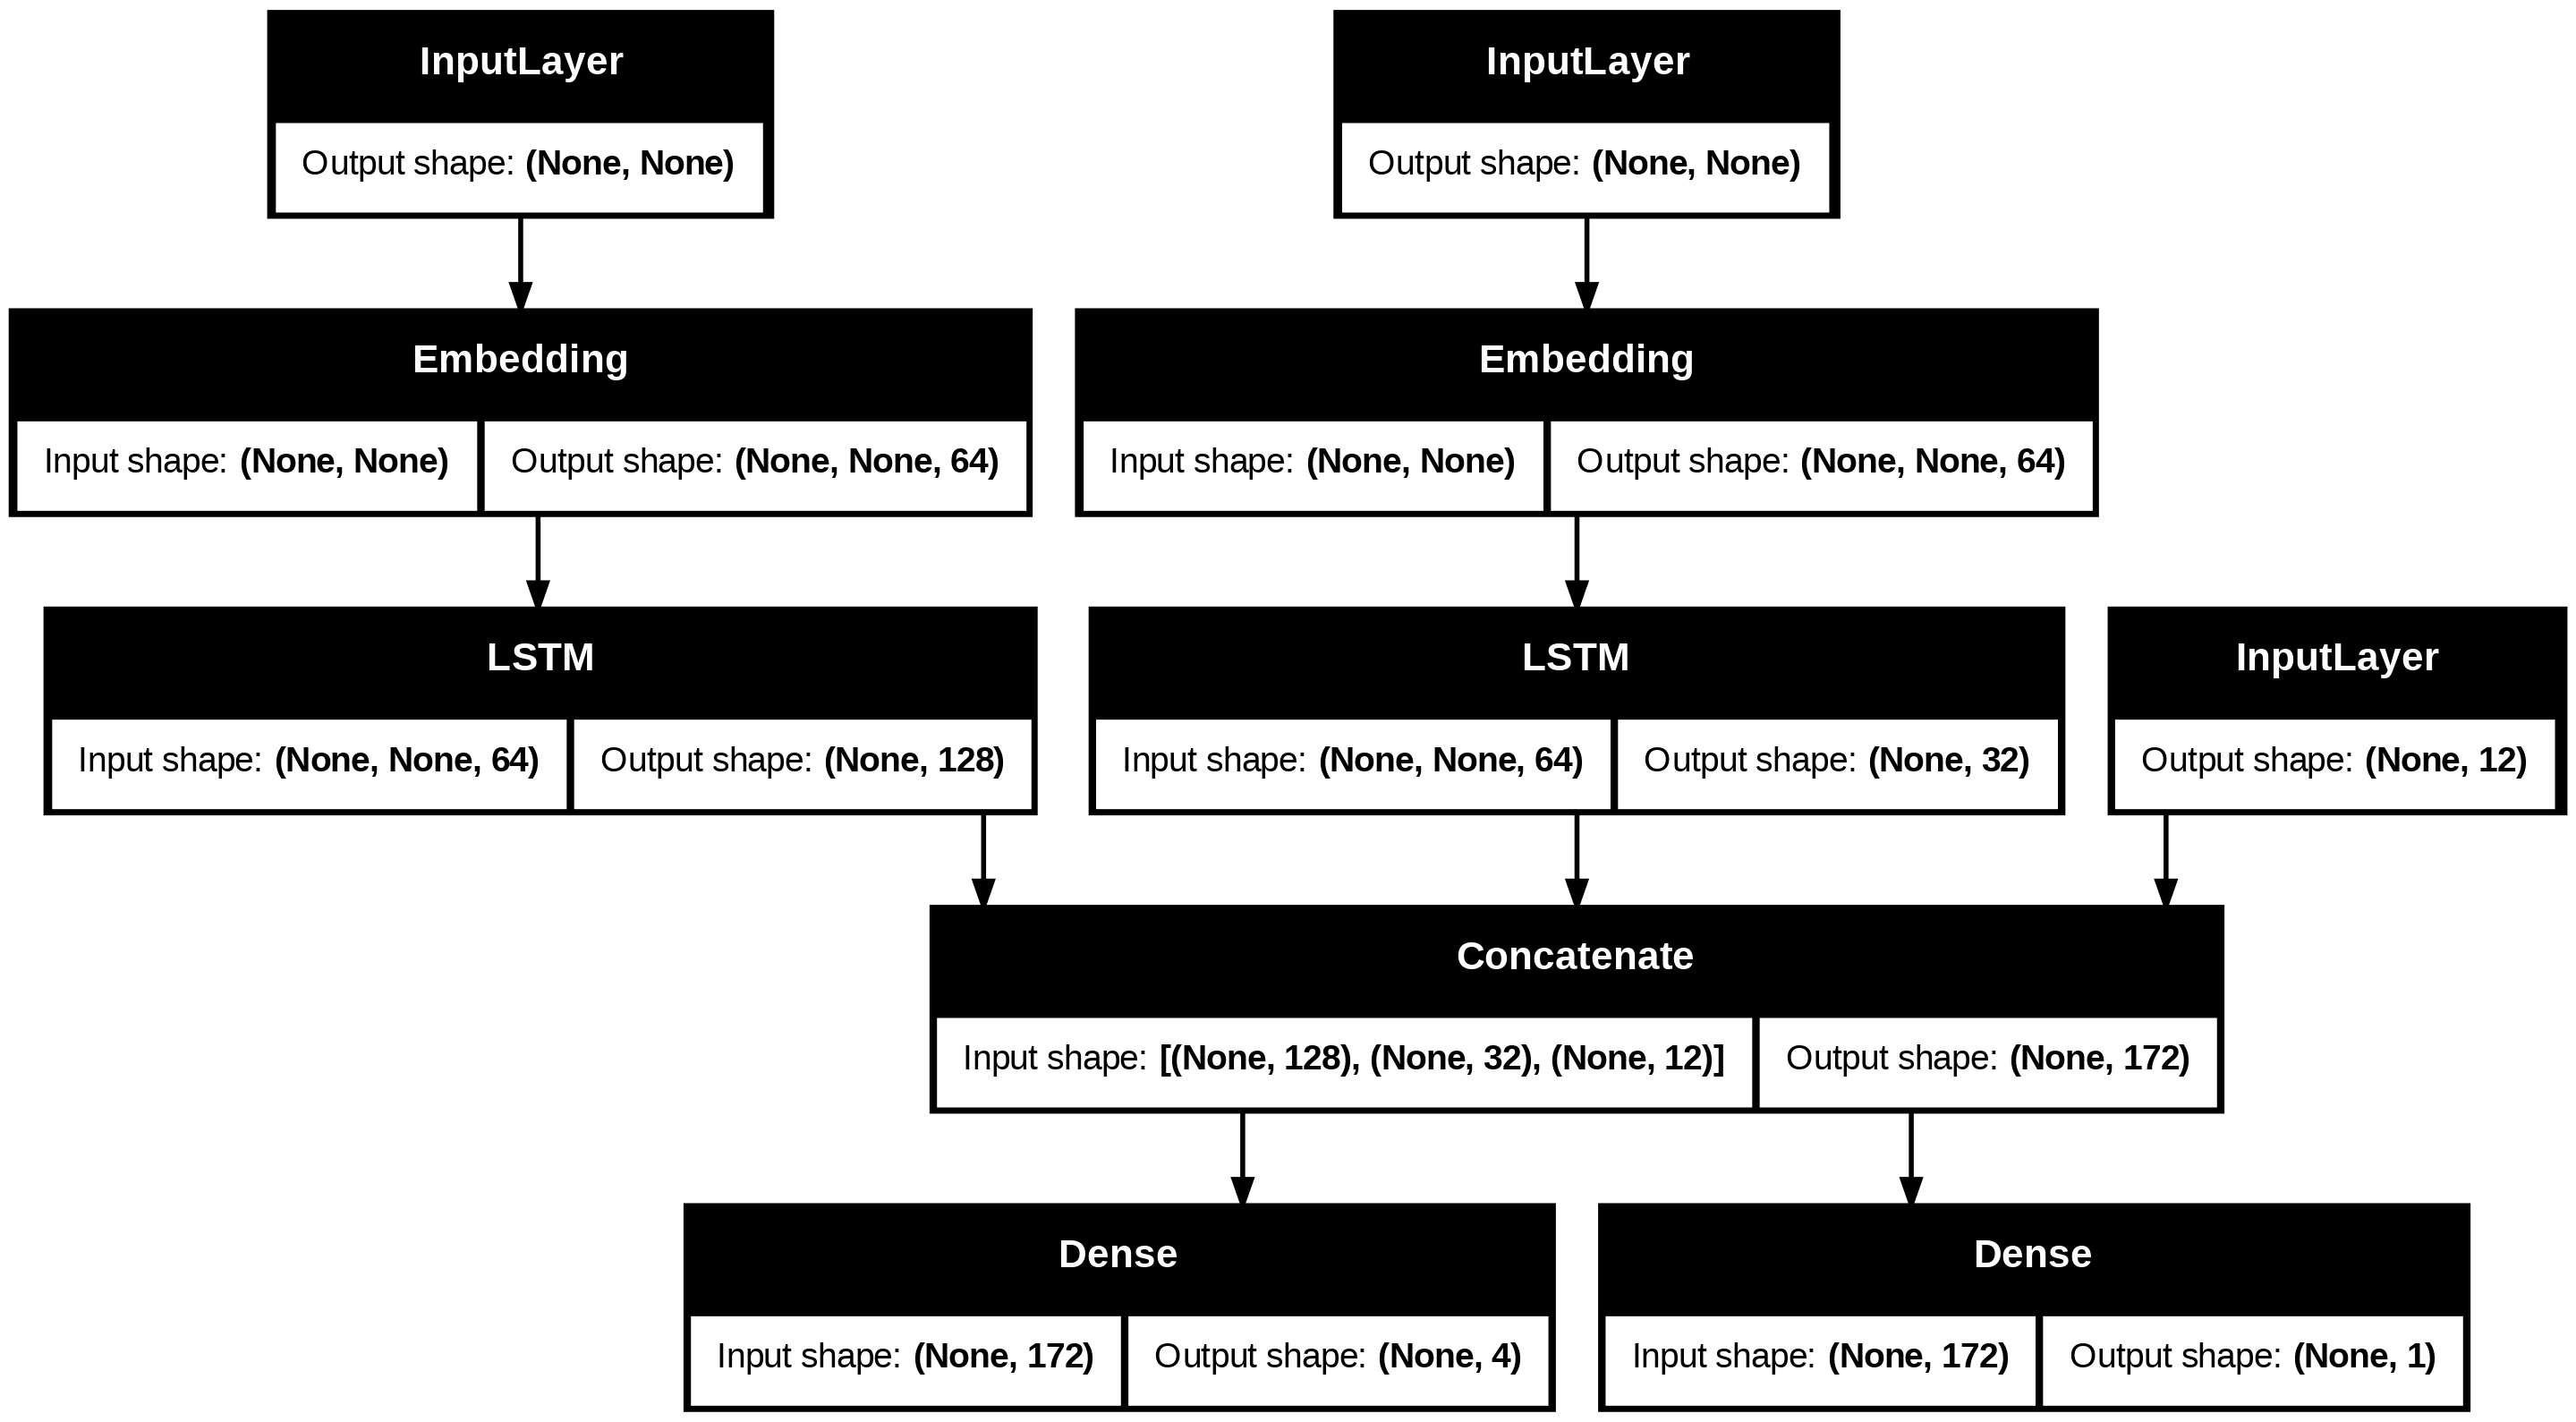

In [ ]:
from keras.utils import plot_model
plot_model(model,show_shapes=True)